Ref : https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

In [7]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("stack-overflow-data.csv")
df.head(2)

In [19]:
# check null values and boolean series return, TRUE for notnull(), false for null
df = df[pd.notnull(df['tags'])]
print(df.head())
print(df["post"].apply(lambda x : len(x.split(' '))).sum())

                                                post         tags
0  what is causing this behavior  in our c# datet...           c#
1  have dynamic html load as if it was in an ifra...      asp.net
2  how to convert a float value in to min:sec  i ...  objective-c
3  .net framework 4 redistributable  just wonderi...         .net
4  trying to calculate and print the mean and its...       python
10286120


We have over 10 million words in the data

In [24]:
df["tags"].value_counts()

javascript       2000
ruby-on-rails    2000
android          2000
c++              2000
java             2000
mysql            2000
c#               2000
jquery           2000
c                2000
html             2000
python           2000
sql              2000
iphone           2000
ios              2000
objective-c      2000
asp.net          2000
angularjs        2000
php              2000
css              2000
.net             2000
Name: tags, dtype: int64

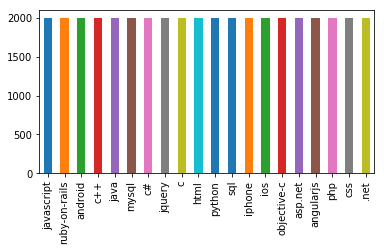

In [27]:
my_tags = ["javascript","ruby-on-rails","android","c++","java",
          "mysql","c#","jquery","c","html",
          "python","sql","iphone","ios","objective-c",
          "asp.net","angularjs","php","css",".net"]

plt.figure(figsize =( 6,3))
df.tags.value_counts().plot(kind='bar');

In [33]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print("Tag:", example[1])

how to convert a float value in to min:sec  i m trying to convert my second in min:sec. my code is:    <pre><code>- (ibaction)calcola:(id)sender  {     float grandezzakb= [[fieldgrandezza text] floatvalue];     float velocitambps= [[fieldvelocita text] floatvalue] ;     float grandezzamb= grandezzakb*1000;     float velocitakb = velocitambps*128;     float seconditotali = grandezzamb/velocitakb;     float min = seconditotali / 60;      nsstring *risultato = [nsstring stringwithformat:@ %.02f minuti   min];      [labelrisultato settext:risultato]; } </code></pre>   sorry if it isn t english but i m italian :d someone can help me  i ve already tried with the mod but it doesn t work with float :( sorry if the code isn t perfect  but i m a newbie :)
Tag: objective-c


In [34]:
print_plot(2)

how to convert a float value in to min:sec  i m trying to convert my second in min:sec. my code is:    <pre><code>- (ibaction)calcola:(id)sender  {     float grandezzakb= [[fieldgrandezza text] floatvalue];     float velocitambps= [[fieldvelocita text] floatvalue] ;     float grandezzamb= grandezzakb*1000;     float velocitakb = velocitambps*128;     float seconditotali = grandezzamb/velocitakb;     float min = seconditotali / 60;      nsstring *risultato = [nsstring stringwithformat:@ %.02f minuti   min];      [labelrisultato settext:risultato]; } </code></pre>   sorry if it isn t english but i m italian :d someone can help me  i ve already tried with the mod but it doesn t work with float :( sorry if the code isn t perfect  but i m a newbie :)
Tag: objective-c


In [36]:
print_plot(3)

.net framework 4 redistributable  just wondering where we can get .net framework 4 beta redistributable. we would like to include it in our cd so we can distribute it to our clients and they need to install it from the cd and not from web as it is not necessary to have internet for our application. any suggestions will be appreciated. thanks navin
Tag: .net


# Text Preprocessing

In [41]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text# HTML decoding
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(" ", text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)# delete stopwords from text
    return text

df["post"] = df["post"].apply(clean_text)
print_plot(3)

net framework 4 redistributable wondering get net framework 4 beta redistributable would like include cd distribute clients need install cd web necessary internet application suggestions appreciated thanks navin
Tag: .net


Now we can have a look a cleaned post:

In [43]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424297

After text cleaning and removing stop words , we have only over 3 million words to work with 

In [45]:
# will convert over text document to a matrix of token count (CountVectorizer)
# then transform a counts matrix to a normalised tfidf representation.

X = df.post
y = df.tags

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier

In [49]:
#Naive Bayes Classifier for Multinomial Models

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

nb = Pipeline([('vect', CountVectorizer()),
              ('tfidf', TfidfTransformer()),
              ('clf', MultinomialNB())
              ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

from sklearn.metrics import classification_report

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=my_tags))

Accuracy Score: 0.7395
Classification Report:
                precision    recall  f1-score   support

   javascript       0.63      0.65      0.64       613
ruby-on-rails       0.94      0.86      0.90       620
      android       0.87      0.92      0.90       587
          c++       0.70      0.77      0.73       586
         java       0.73      0.87      0.79       599
        mysql       0.72      0.51      0.60       589
           c#       0.77      0.74      0.75       594
       jquery       0.69      0.89      0.78       610
            c       0.63      0.59      0.61       617
         html       0.57      0.65      0.60       587
       python       0.70      0.50      0.59       611
          sql       0.79      0.78      0.79       594
       iphone       0.84      0.59      0.69       619
          ios       0.66      0.84      0.74       574
  objective-c       0.64      0.83      0.72       584
      asp.net       0.66      0.64      0.65       578
    angularjs    

In [50]:
# Linear Support Vector Machine

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


accuracy 0.7883333333333333
               precision    recall  f1-score   support

   javascript       0.74      0.67      0.70       613
ruby-on-rails       0.84      0.93      0.88       620
      android       0.87      0.95      0.91       587
          c++       0.81      0.80      0.81       586
         java       0.74      0.88      0.81       599
        mysql       0.76      0.40      0.52       589
           c#       0.83      0.68      0.75       594
       jquery       0.70      0.95      0.81       610
            c       0.82      0.56      0.66       617
         html       0.72      0.59      0.65       587
       python       0.71      0.65      0.68       611
          sql       0.81      0.87      0.84       594
       iphone       0.76      0.79      0.78       619
          ios       0.83      0.86      0.85       574
  objective-c       0.82      0.80      0.81       584
      asp.net       0.70      0.68      0.69       578
    angularjs       0.80      0.90  

In [52]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7816666666666666
               precision    recall  f1-score   support

   javascript       0.70      0.62      0.66       613
ruby-on-rails       0.91      0.91      0.91       620
      android       0.97      0.94      0.95       587
          c++       0.77      0.77      0.77       586
         java       0.77      0.81      0.79       599
        mysql       0.59      0.58      0.58       589
           c#       0.77      0.76      0.76       594
       jquery       0.82      0.85      0.83       610
            c       0.69      0.71      0.70       617
         html       0.61      0.59      0.60       587
       python       0.64      0.64      0.64       611
          sql       0.82      0.83      0.83       594
       iphone       0.78      0.77      0.77       619
          ios       0.84      0.85      0.84       574
  objective-c       0.80      0.83      0.82       584
      asp.net       0.65      0.64      0.64       578
    angularjs       0.82      0.85  